In [6]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

def get_reward(prob, n = 10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward
def update_record(record,action,r):
    new_r = (record[action,0]*record[action,1]+r)/(record[action,0]+1)
    record[action,0] += 1
    record[action,1] = new_r
    return record
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [103]:
n = 10
probs = np.random.rand(n)
probs

array([0.95310213, 0.49337968, 0.34842782, 0.59218358, 0.74964166,
       0.28388271, 0.74503052, 0.07048094, 0.8734586 , 0.62563318])

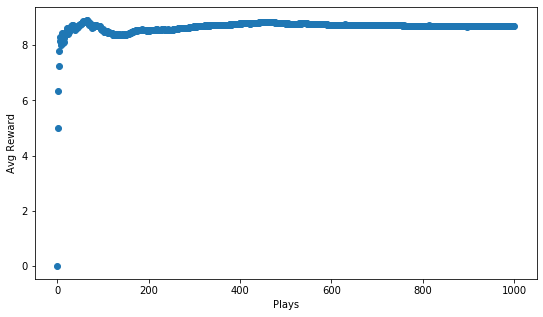

In [104]:
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(1000):
    if random.random() > 0.2:##최적을 찾아도 엡실론 때문에 모험을 한다
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

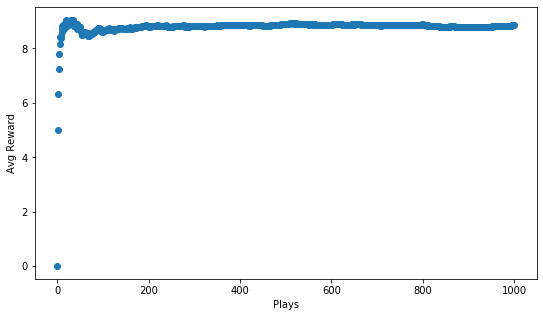

In [114]:
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
e = 0.2

for i in range(1000):
    if random.random() > e:##최적을 찾아도 엡실론 때문에 모험을 한다
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
    isover10 = True
    for i in record[:,0]:
        if i < 10:
            isover10 = False
            break
    if isover10:
        e = 0
ax.scatter(np.arange(len(rewards)),rewards)

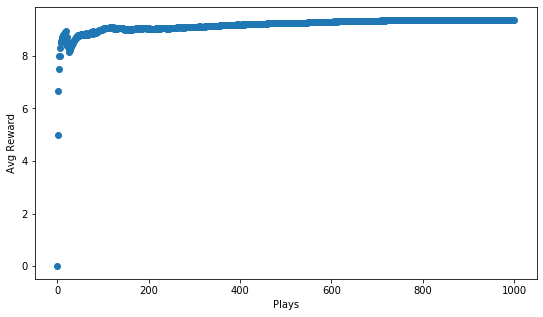

In [108]:
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
e = 0.2

for i in range(1000):
    if random.random() > e:##최적을 찾아도 엡실론 때문에 모험을 한다
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
    e -= 0.0005
ax.scatter(np.arange(len(rewards)),rewards)

In [44]:
print(record)
print(e)

[[ 20.           5.9       ]
 [ 10.           3.6       ]
 [ 12.           2.25      ]
 [ 18.           8.22222222]
 [ 15.           7.13333333]
 [ 11.           7.81818182]
 [866.           8.59699769]
 [ 18.           6.55555556]
 [ 11.           8.09090909]
 [ 19.           7.89473684]]
0


In [119]:
total = 0
for i in range(10):
    total += record[i,0]*record[i,1]
print(total)

9580.999999999996


In [ ]:
8852.0
9012.999999999996

In [ ]:
9069.999999999998
9131.99999999999
9757.000000000004

In [ ]:
8714.000000000004 #엡실론 변경 x
8844.999999999996 #10번 베이스 엡실론 변경
9380.999999999993 #한번에 0.0005씩 줄이기
9580.999999999996 #한번씩 해보고 젤 좋은거 ㄱ

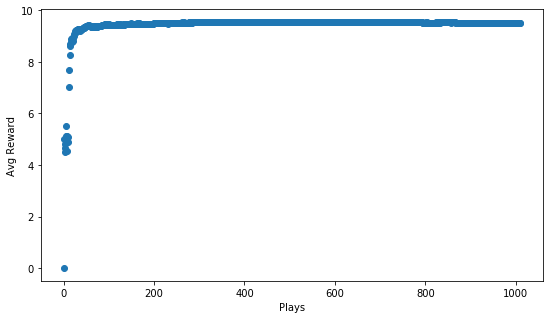

In [118]:
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
e = 0.2

for i in range(10):
    r = get_reward(probs[i])
    last.append(r)
    record = update_record(record,i,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
for i in range(1000):
    choice = get_best_arm(record)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)